In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-03T23:10:15.677584+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

matplotlib: 3.9.2
teeplot   : 1.4.2
pandas    : 2.2.3
seaborn   : 0.13.2
numpy     : 2.1.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-04-30-profile-mut-screen"
teeplot_subdir


'2025-04-30-profile-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/9rck3/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [10]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    ["trt_name", "replicate_uuid", "screen_uuid", "screen_name", "tb_stat"],
    observed=True,
)
for (trt_name, replicate_uuid, screen_uuid, screen_name, tb_stat), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]]
    grp_nonfocal = grp[~grp["is_focal_mutation"]]

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )
    for __ in range(1_000):
        records.append(
            {
                **record,
                **{
                    stat: grp_nonfocal[stat].sample(1).item() for stat in stats
                },
                **{"mutation": "nonfocal"},
            },
        )


100%|██████████| 360/360 [05:36<00:00,  1.07it/s]


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


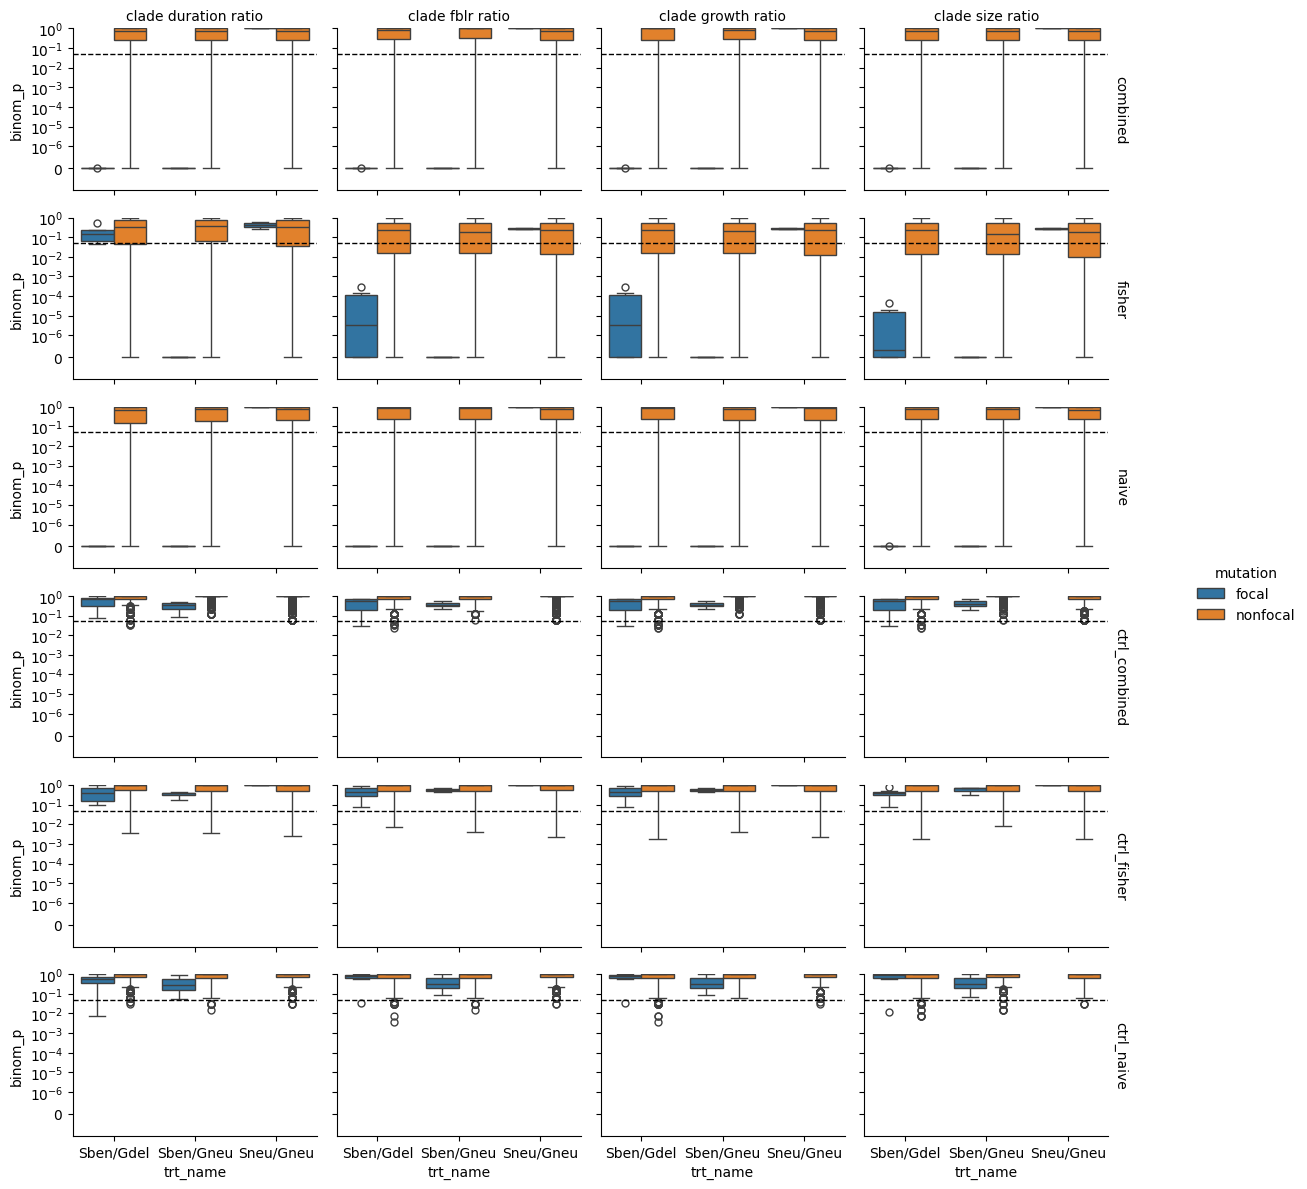

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


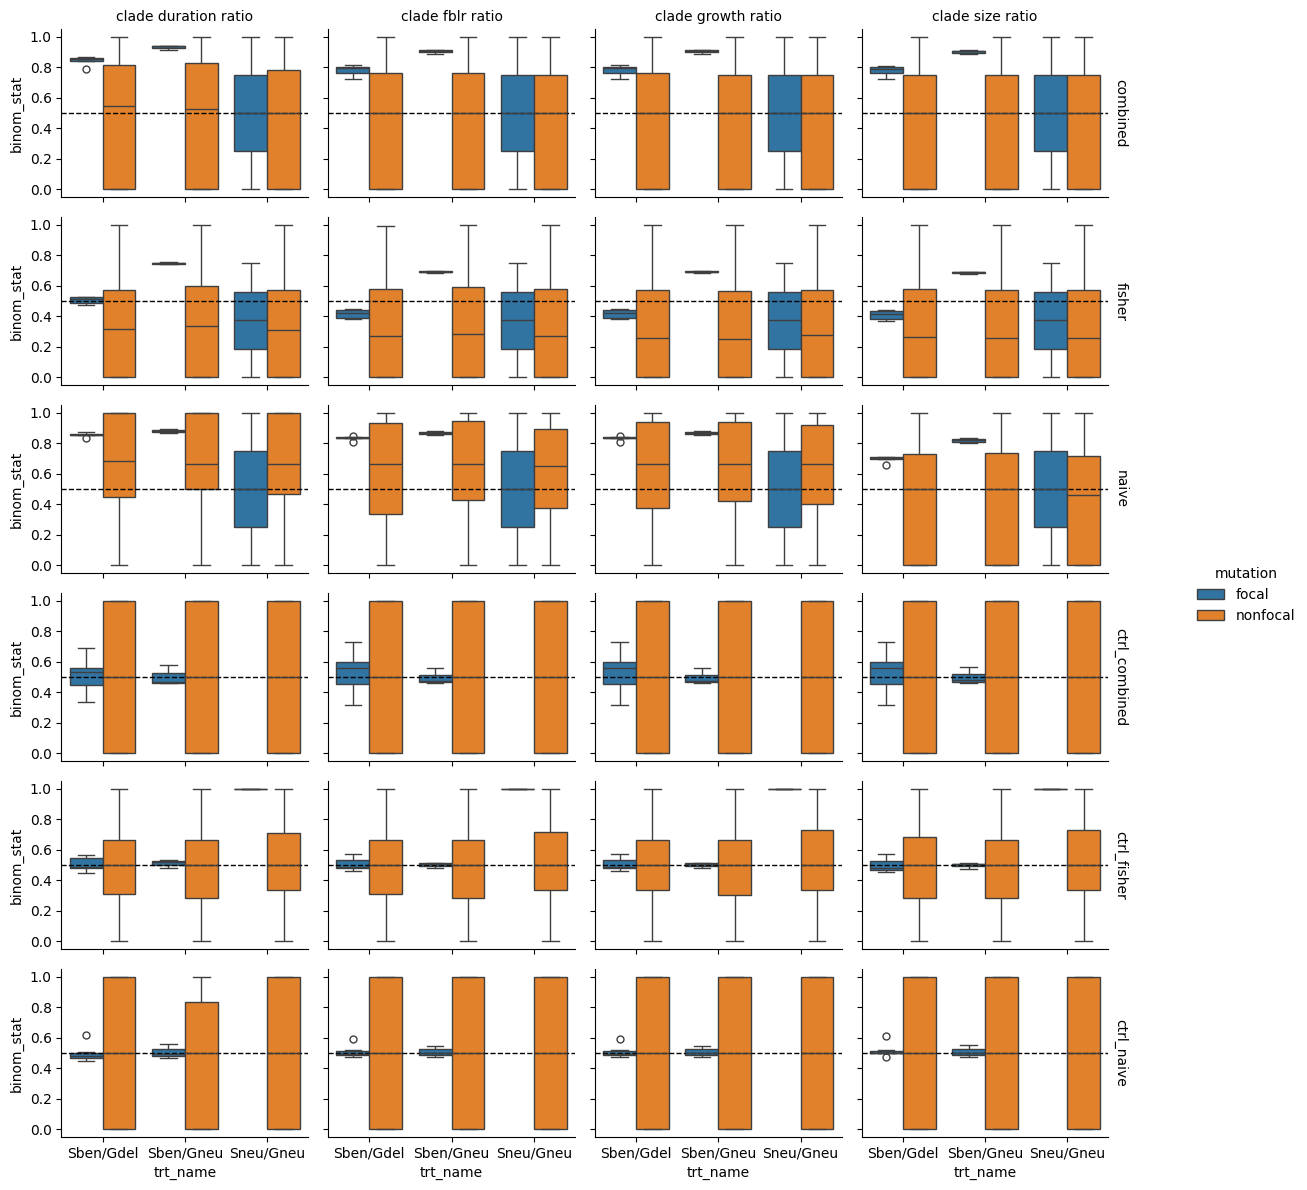

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


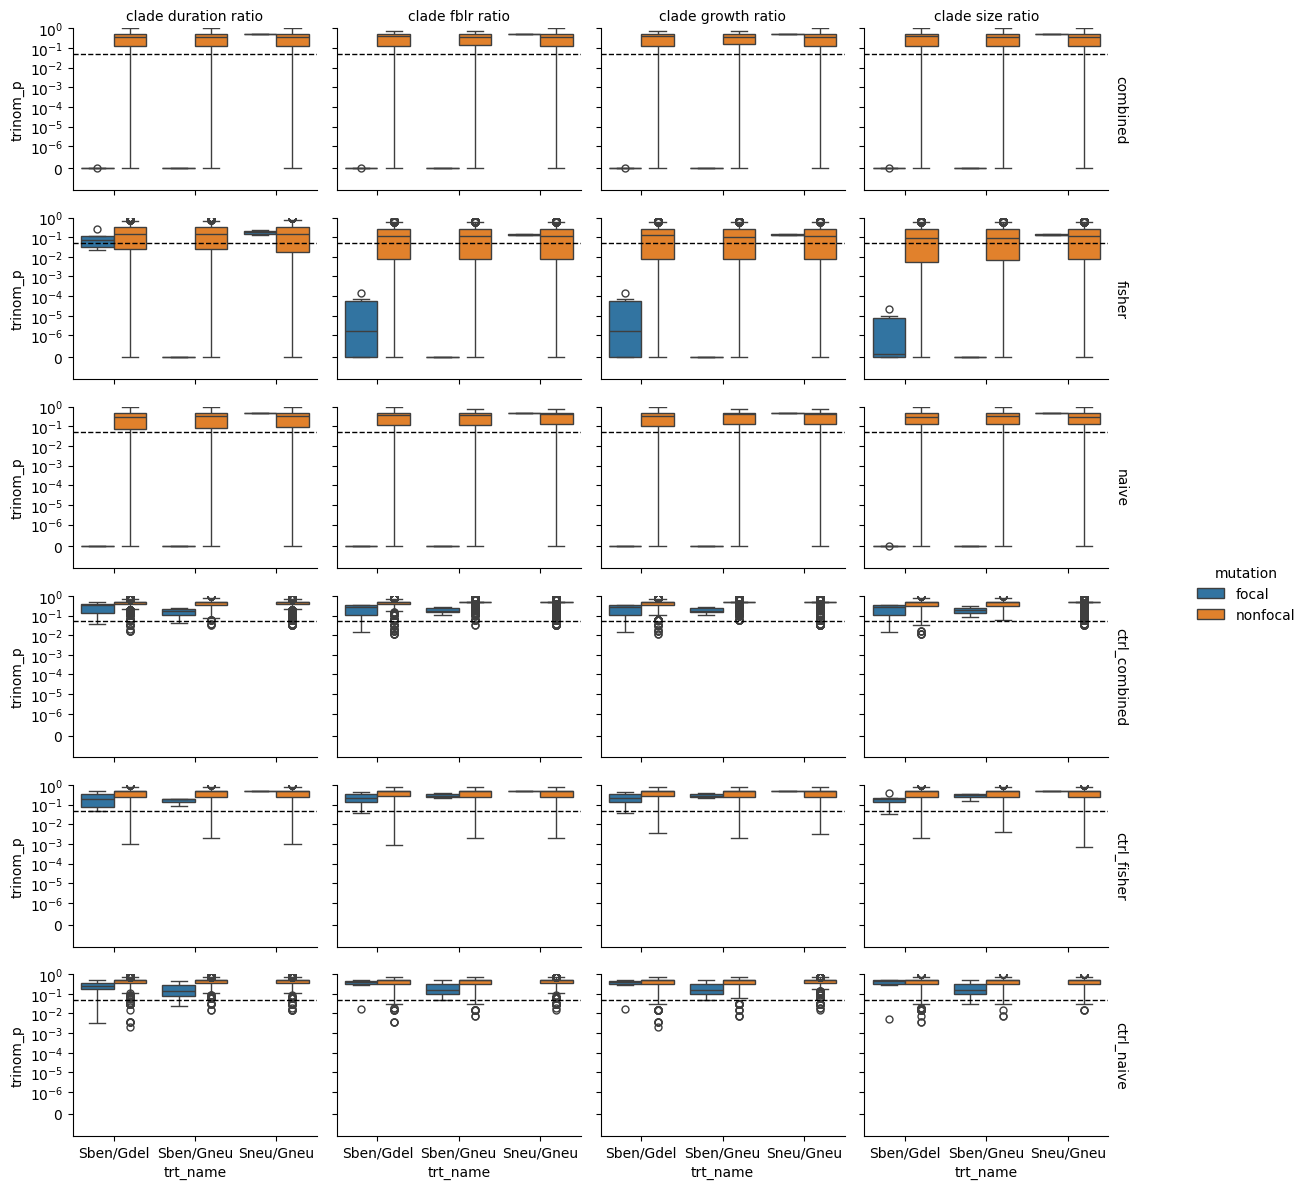

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


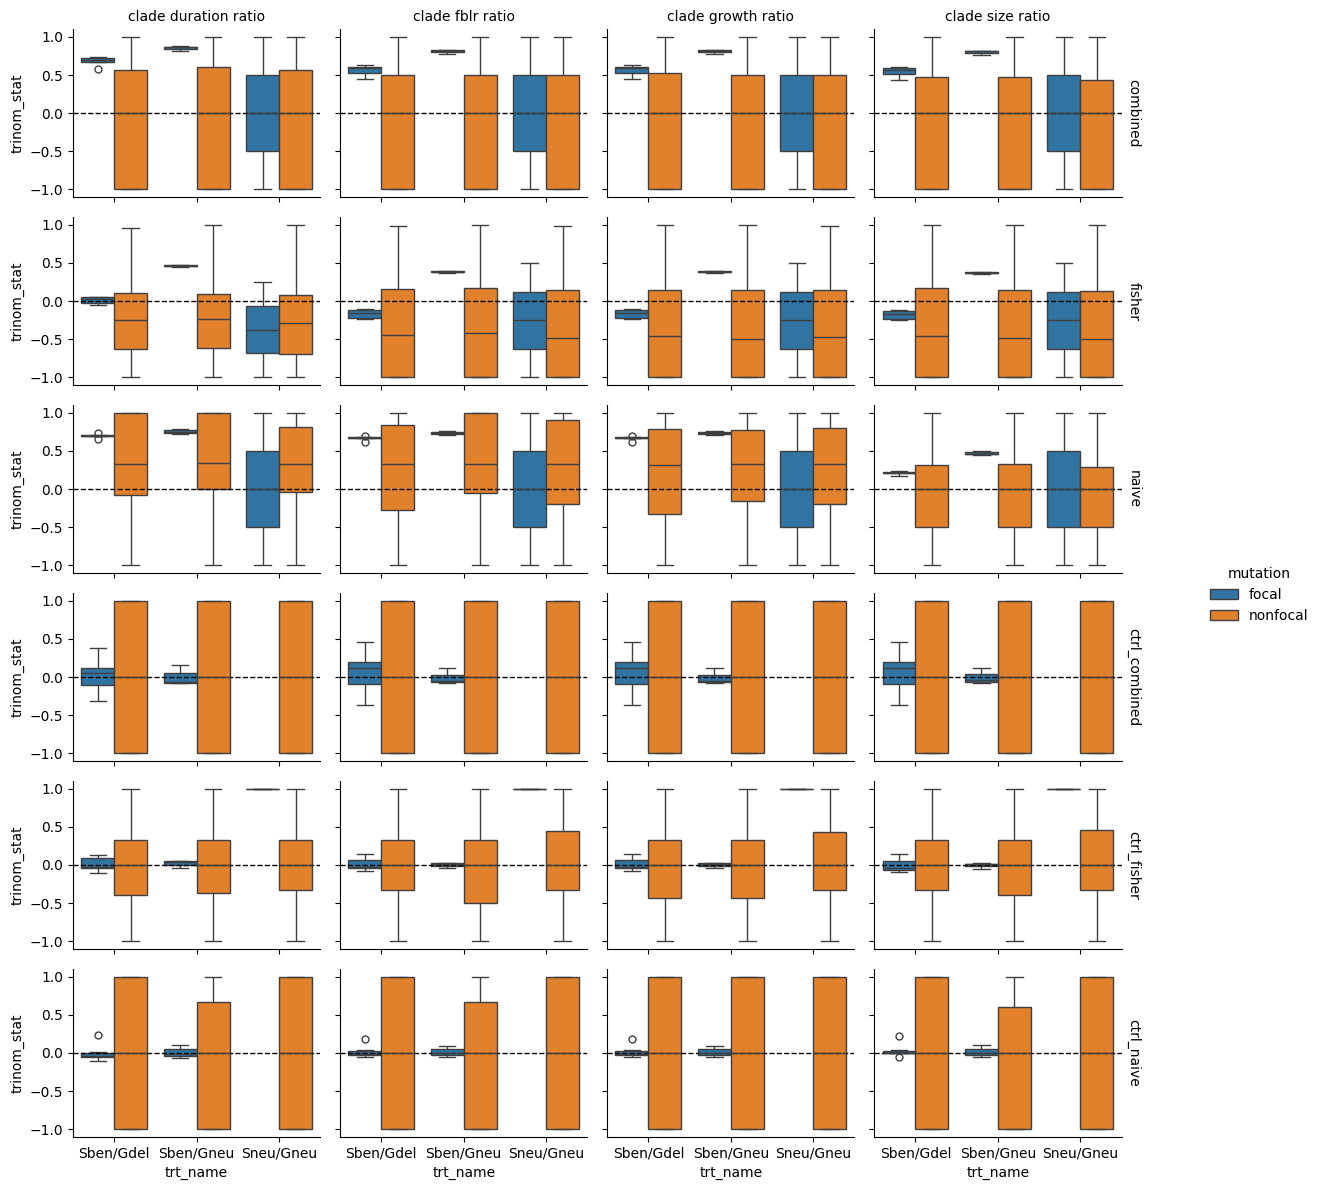

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


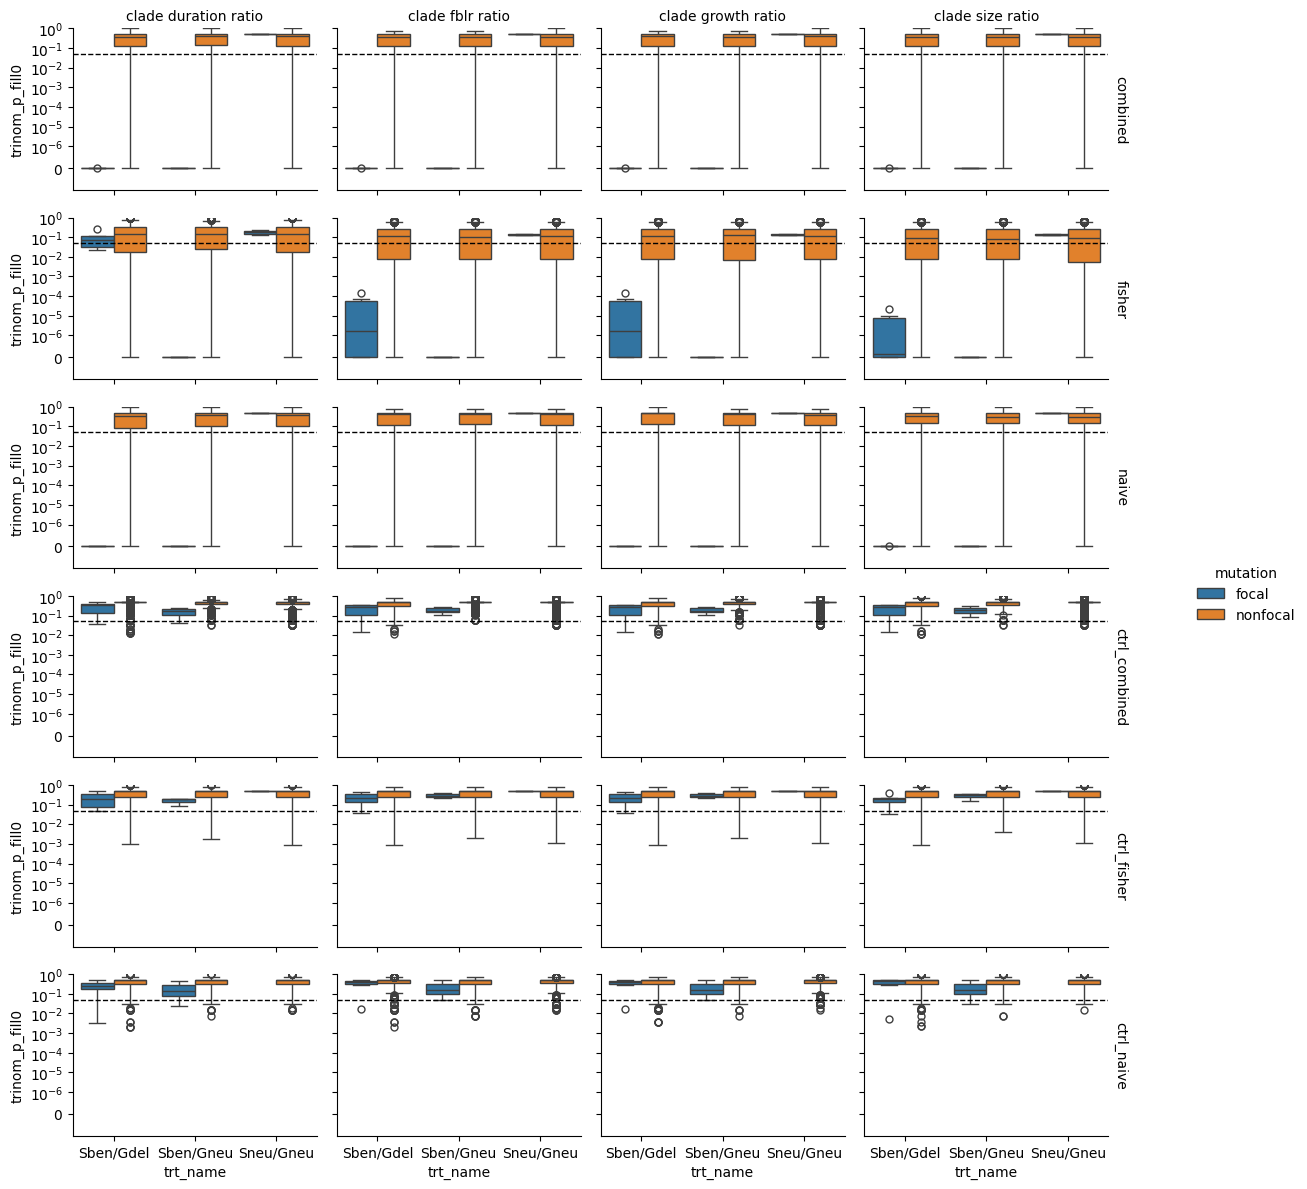

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


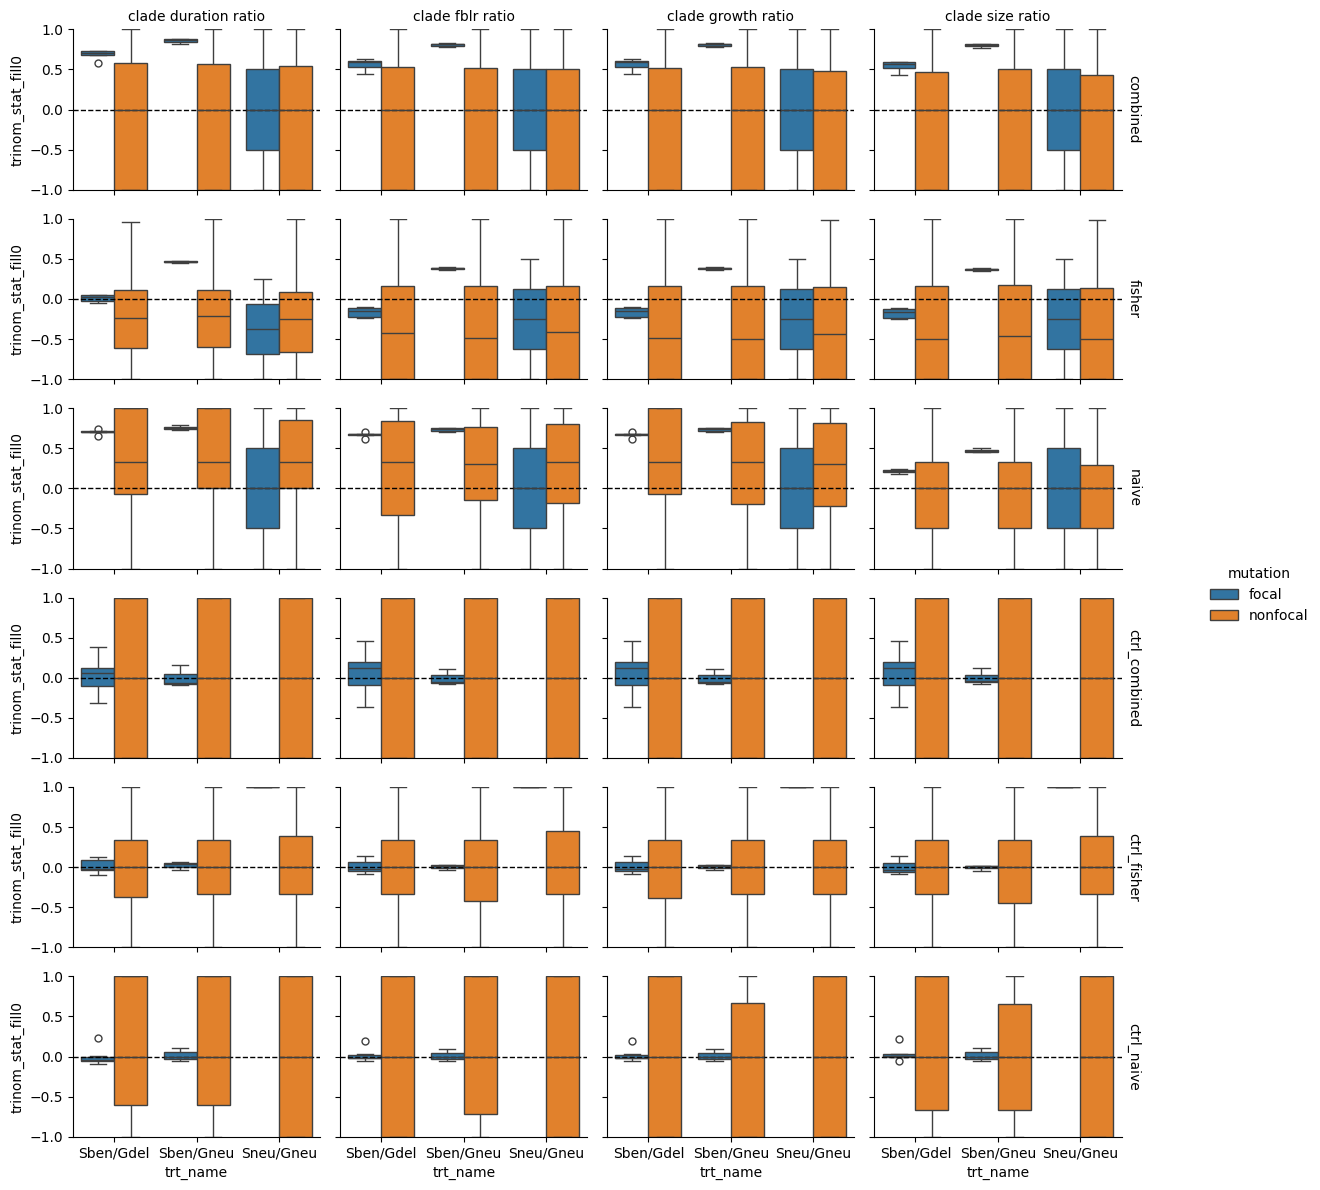

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


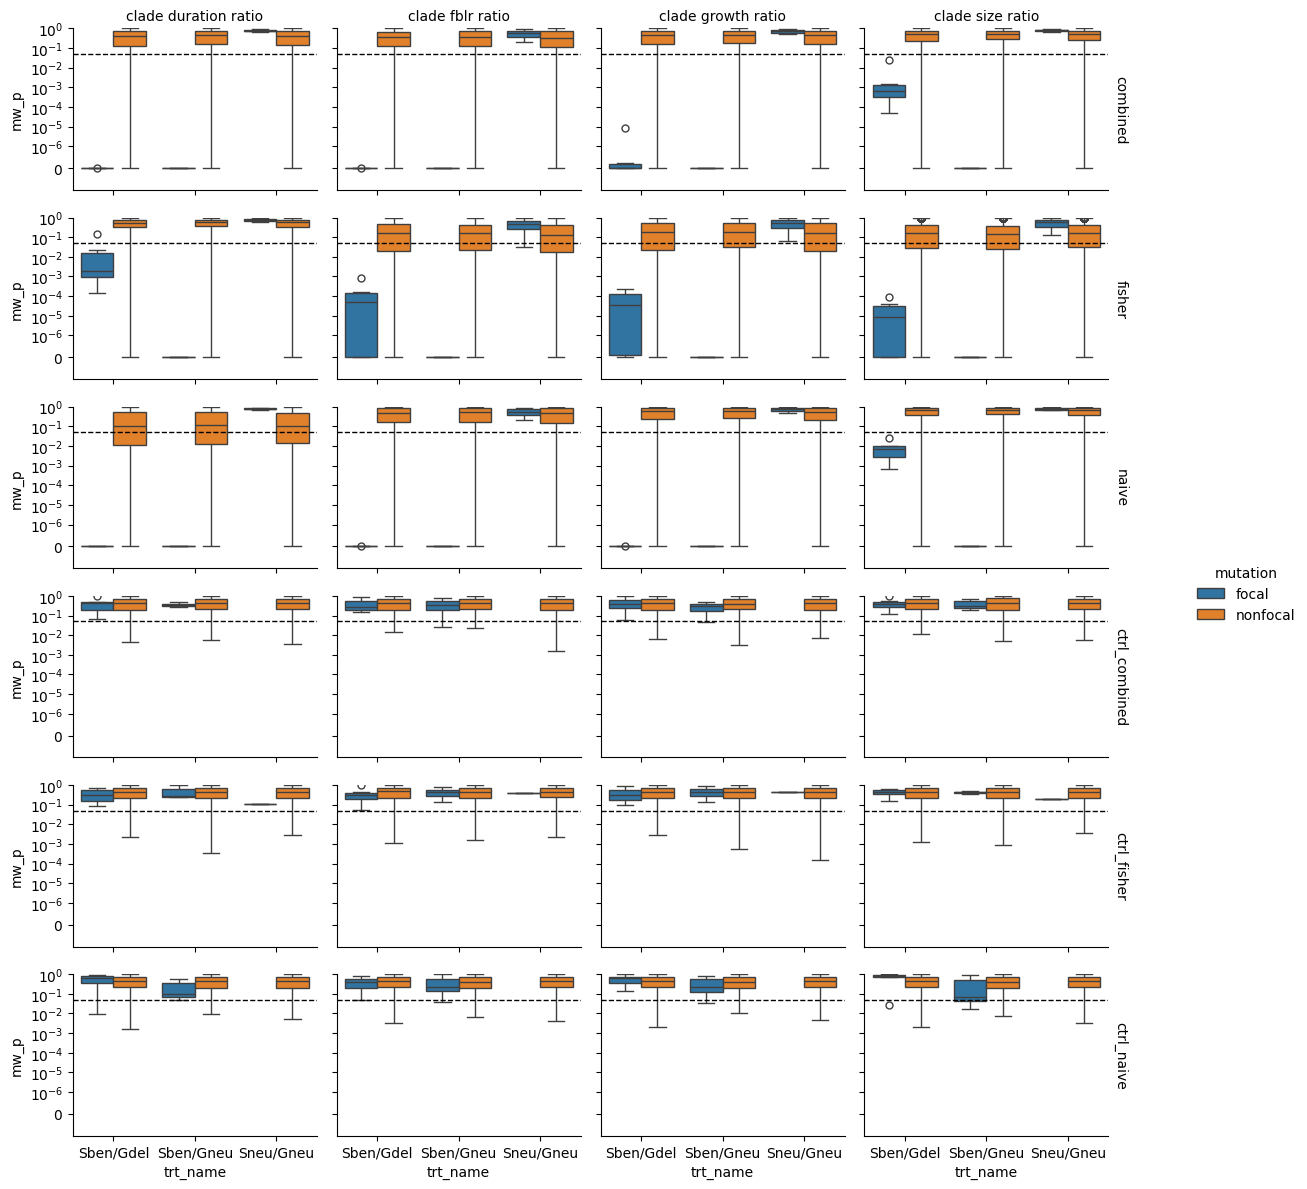

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


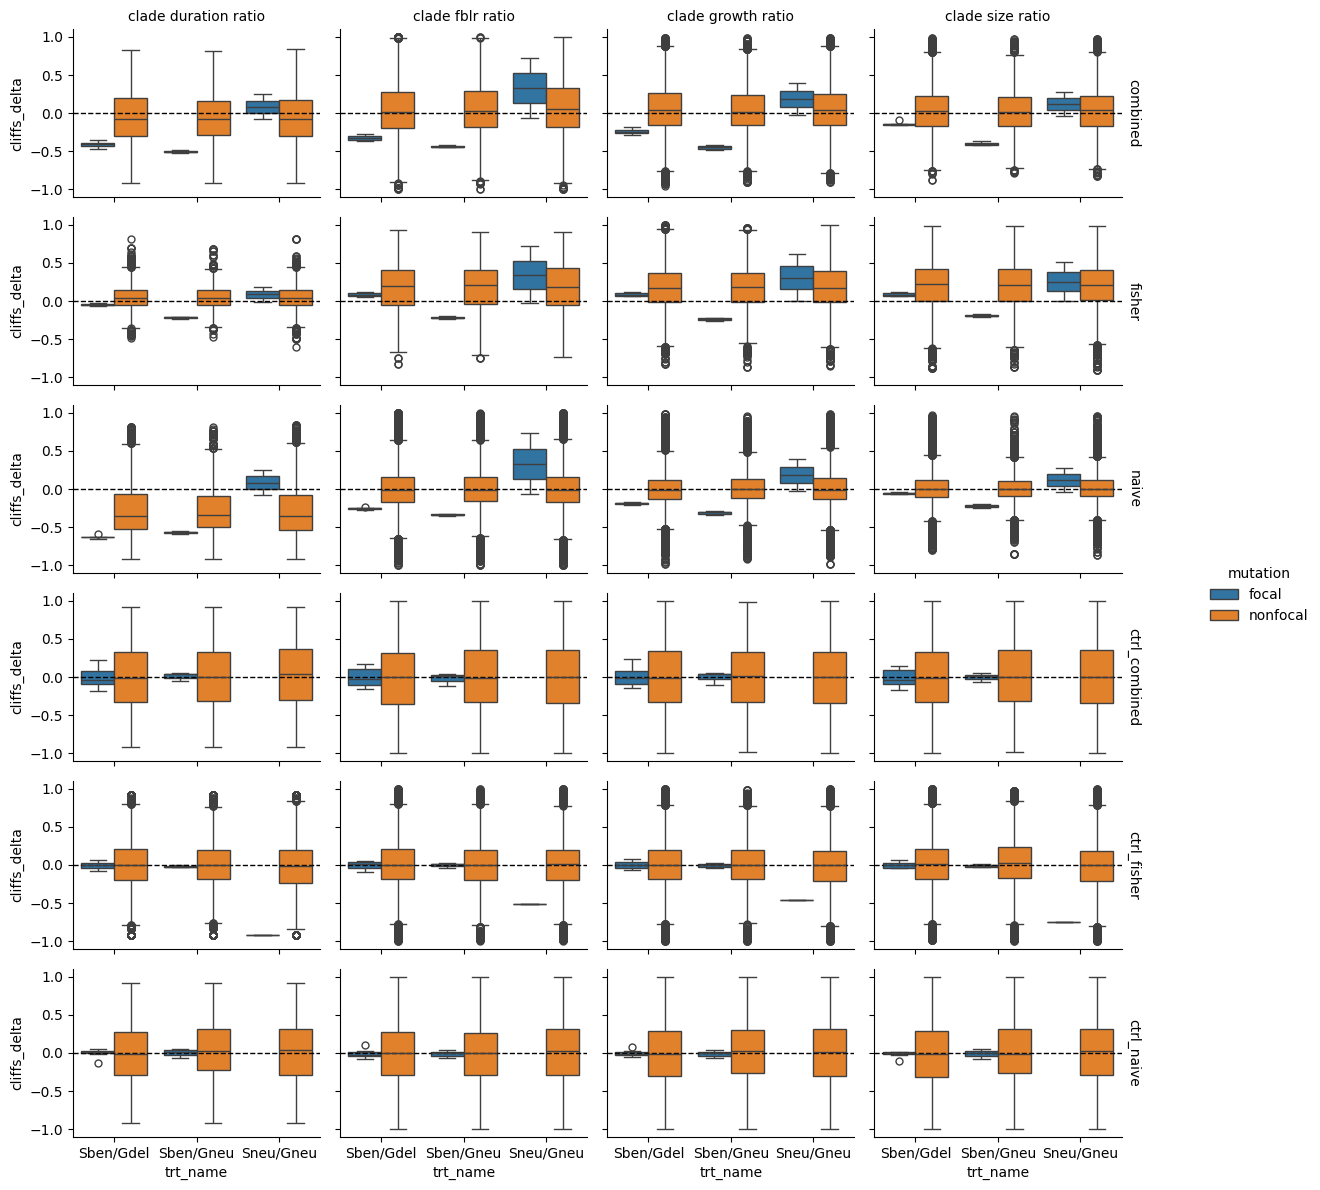

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


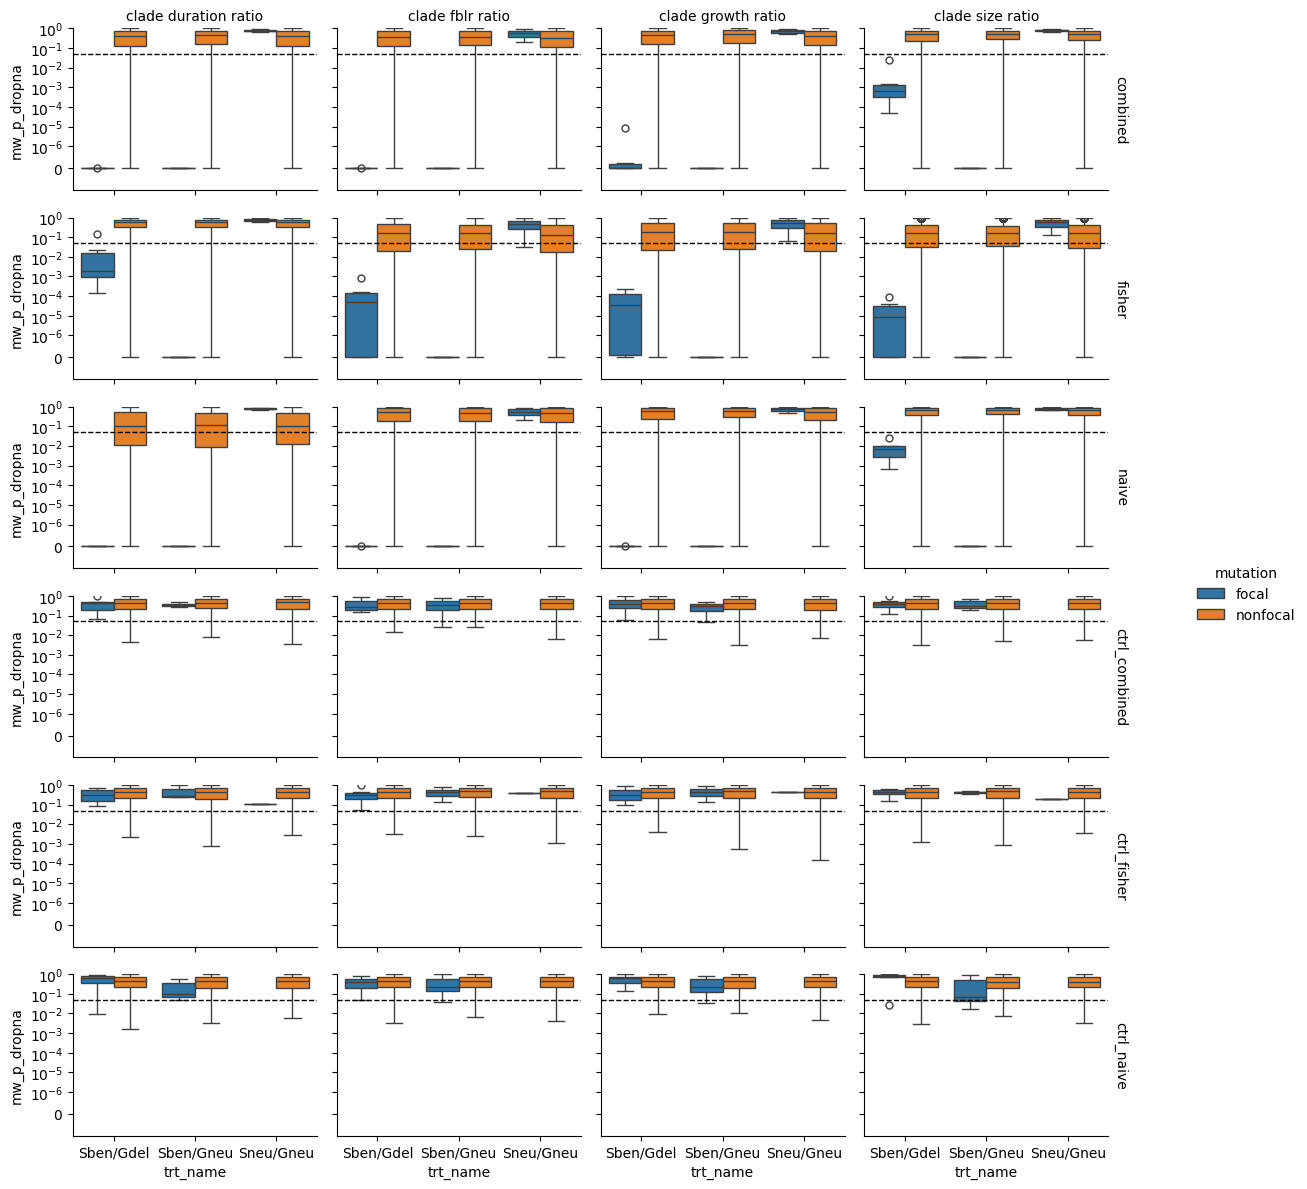

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


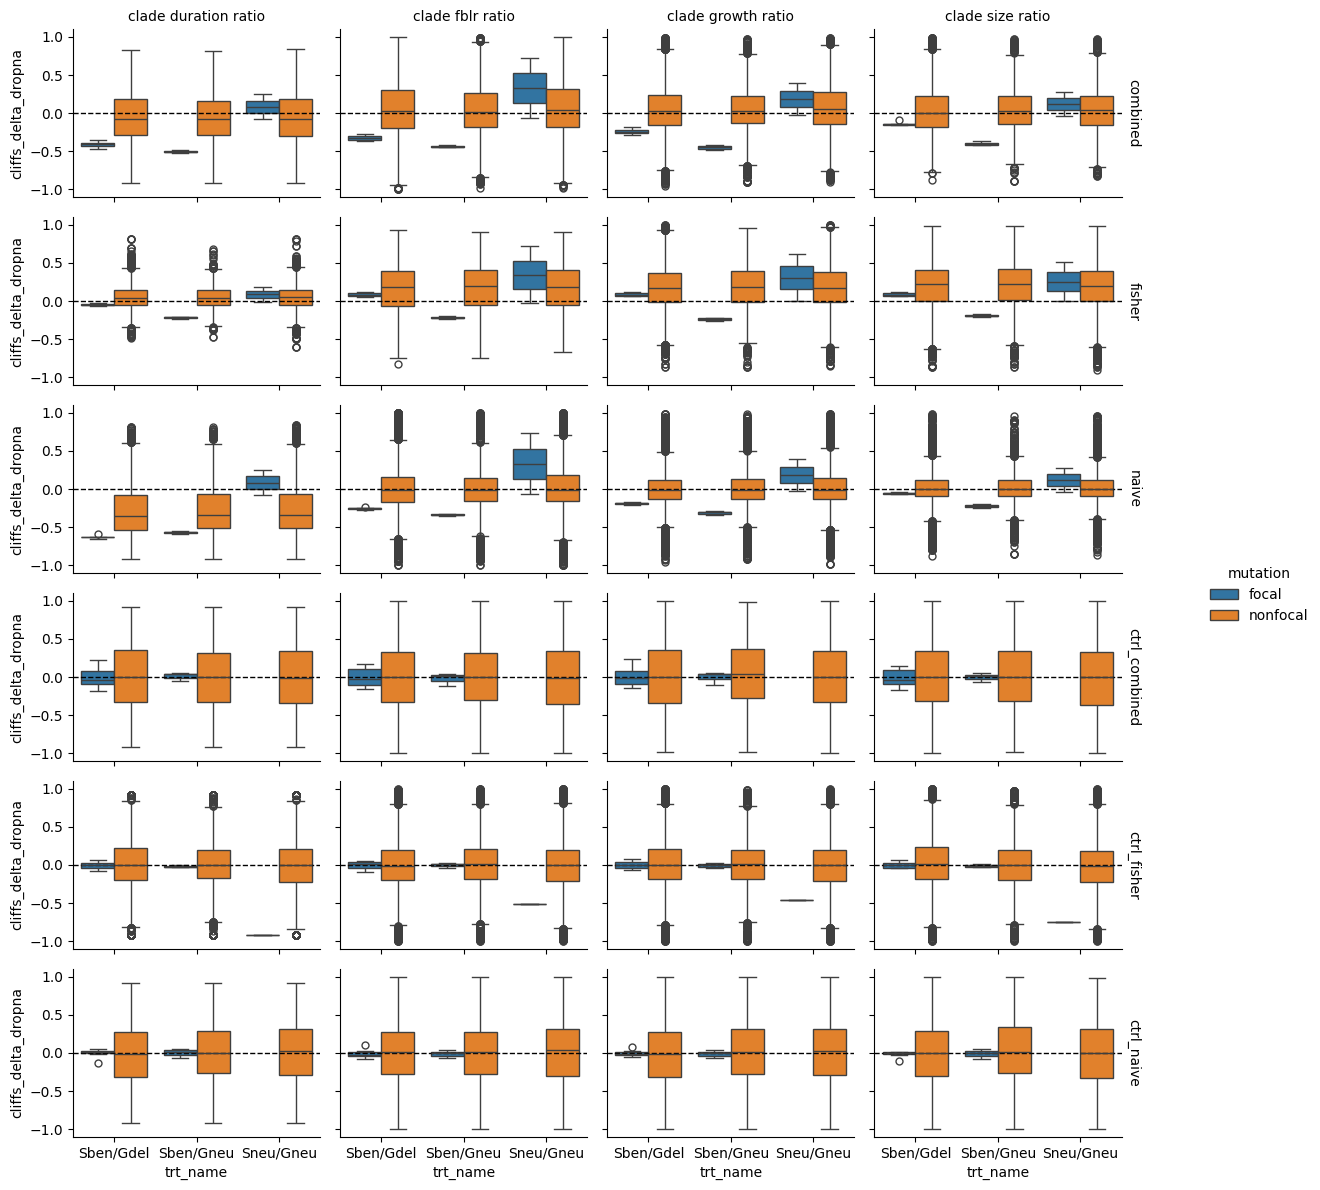

In [11]:
for stat in stats:
    display(HTML(f"<h3>{stat}</h3>"))
    with tp.teed(
        sns.catplot,
        data=pd.DataFrame(records),
        x="trt_name",
        y=stat,
        hue="mutation",
        row="screen_name",
        col="tb_stat",
        kind="box",
        height=2,
        aspect=1.5,
        margin_titles=True,
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.set(
            ylim={
                "binom_p": (-1e-6, 1),
                "binom_stat": (-0.05, 1.05),
                "trinom_p": (-1e-6, 1),
                "trinom_stat": (-1.1, 1.1),
                "trinom_p_fill0": (-1e-6, 1),
                "trinom_stat_fill0": (-1, 1),
                "mw_p": (-1e-6, 1),
                "cliffs_delta": (-1.1, 1.1),
                "mw_p_dropna": (-1e-6, 1),
                "cliffs_delta_dropna": (-1.1, 1.1),
            }[stat],
        )
        if "_p" not in stat:
            teed.map(
                plt.axhline,
                y={
                    "binom_stat": 0.5,
                    "trinom_stat": 0,
                    "trinom_stat_fill0": 0,
                    "cliffs_delta": 0,
                    "cliffs_delta_dropna": 0,
                }[stat],
                color="black",
                linestyle="--",
                linewidth=1,
            )
        else:
            for ax in teed.axes.flatten():
                ax.set_yscale("symlog", linthresh=1e-6)

            teed.map(
                plt.axhline,
                y=0.05,
                color="black",
                linestyle="--",
                linewidth=1,
            )


In [12]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


,mut_nobs,mut_freq,binom_n,binom_k,binom_p,mw_p_dropna,tb_stat,screened_N,trt_name,mut_char_pos,screened_nanmean
28239,20854,0.034385,142,67,5.570710e-01,0.473290,clade growth ratio,142,Sben/Gneu,0,-0.005227
28247,20854,0.034385,333,166,1.000000e+00,0.950097,clade size ratio,339,Sben/Gneu,0,0.025845
224762,11334,0.018826,3835,1040,0.000000e+00,0.000000,clade size ratio,6649,Sben/Gneu,0,-0.412156
196899,21453,0.035575,133,77,8.249129e-02,0.331765,clade duration ratio,133,Sben/Gneu,0,NaN
84856,18404,0.030120,512,247,4.525038e-01,0.427784,clade growth ratio,512,Sben/Gneu,0,-0.002276
196912,21453,0.035575,546,280,5.780128e-01,0.136236,clade growth ratio,546,Sben/Gneu,0,0.002327
113041,9822,0.016101,4017,1557,0.000000e+00,0.000000,clade size ratio,4183,Sben/Gneu,0,-0.484486
113028,9822,0.016101,1356,441,1.580358e-38,0.000000,clade fblr ratio,1362,Sben/Gneu,0,-0.002366
84852,18404,0.030120,961,854,0.000000e+00,0.000000,clade growth ratio,962,Sben/Gneu,0,0.014177
224760,11334,0.018826,1407,478,1.026997e-33,0.000000,clade size ratio,1538,Sben/Gneu,0,-0.861009
